# Making a trial by trial fit of faceWord dataand using that for searchligth classificiation

This tutorial will load models and data from tutorial 13 and change the design matrix to one that gives a beta estimate for each trial.

In [1]:
# import some functionality
from datetime import datetime

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
import os
import pip
os.system('python -m pip install numpy')
os.system('python -m pip install matplotlib')
os.system('python -m pip install scipy')
os.system('python -m pip install panda')
os.system('python -m pip install nilearn')
os.system('python -m pip install sklearn')
os.system('python -m pip install pickle')
os.system('python -m pip install atlasreader')
os.system('python -m pip install seaborn')

#import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.ndimage import gaussian_filter

%matplotlib inline

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 23:30:42
Finishing cell: 23:30:57


In [2]:
import pickle

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

# Getting the first level models from tutorial 13:
f = open('/work/74470/WordFace_first_level_models.pkl', 'rb')
models, models_run_imgs, models_events, models_confounds = pickle.load(f)
f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 23:30:57


/opt/conda/lib/python3.10/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


Finishing cell: 23:31:27


### Figuring out what is in the models_events variable

In [3]:
#Number of participants
print(len(models_events))
N=models_events[1][1].shape[0]

print(models_confounds[1][3].shape[0])
print(models[1].t_r)

text = "Number of images: %d, number of trials: %d" % (models_confounds[1][3].shape[0], N)
print(text)

22
610
1.0
Number of images: 610, number of trials: 120


## Creating new design matrices with a column per experimental trial.

In [4]:
import pandas as pd
from nilearn.glm.first_level import make_first_level_design_matrix
import numpy as np

N_par=len(models_events) # Number of participants
lsa_dm= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    for ii in range(len(models_events[i])):
        #N=number of events
        N=models_events[i][ii].shape[0]
        #Number of images per session (determined by number of rows in confounding variable)
        N_img=models_confounds[i][ii].shape[0]
        #duration of scan
        dur=N_img*models[i].t_r # duration of run
        # Vector of timepoints duratoin and number of images 
        t_fmri = np.linspace(0, dur,N_img,endpoint=False)
        # We have to create a dataframe with onsets/durations/trial_types
        # No need for modulation!
        trials = pd.DataFrame(models_events[i][ii], columns=['onset'])
        trials.loc[:, 'duration'] = 0.7
        trials.loc[:, 'trial_type'] = ['t_'+str(iii).zfill(3) + '_' + models_events[i][ii]['trial_type'][iii-1]  for iii in range(1, N+1)]

        # lsa_dm = least squares all design matrix
        lsa_dm[i].append(make_first_level_design_matrix(
            frame_times=t_fmri,  # we defined this earlier 
            events=trials,
            add_regs=models_confounds[i][ii], #Add the confounds from fmriprep
            hrf_model='glover',
            drift_model='cosine'  
        ))
    




now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

/opt/conda/lib/python3.10/site-packages/nilearn/_utils/glm.py:310: UserWarning: Matrix is singular at working precision, regularizing...
  warn('Matrix is singular at working precision, regularizing...')
/opt/conda/lib/python3.10/site-packages/nilearn/_utils/glm.py:310: UserWarning: Matrix is singular at working precision, regularizing...
  warn('Matrix is singular at working precision, regularizing...')


Finishing cell: 23:33:31


## Plot selected design matrices

Finishing cell: 23:33:36


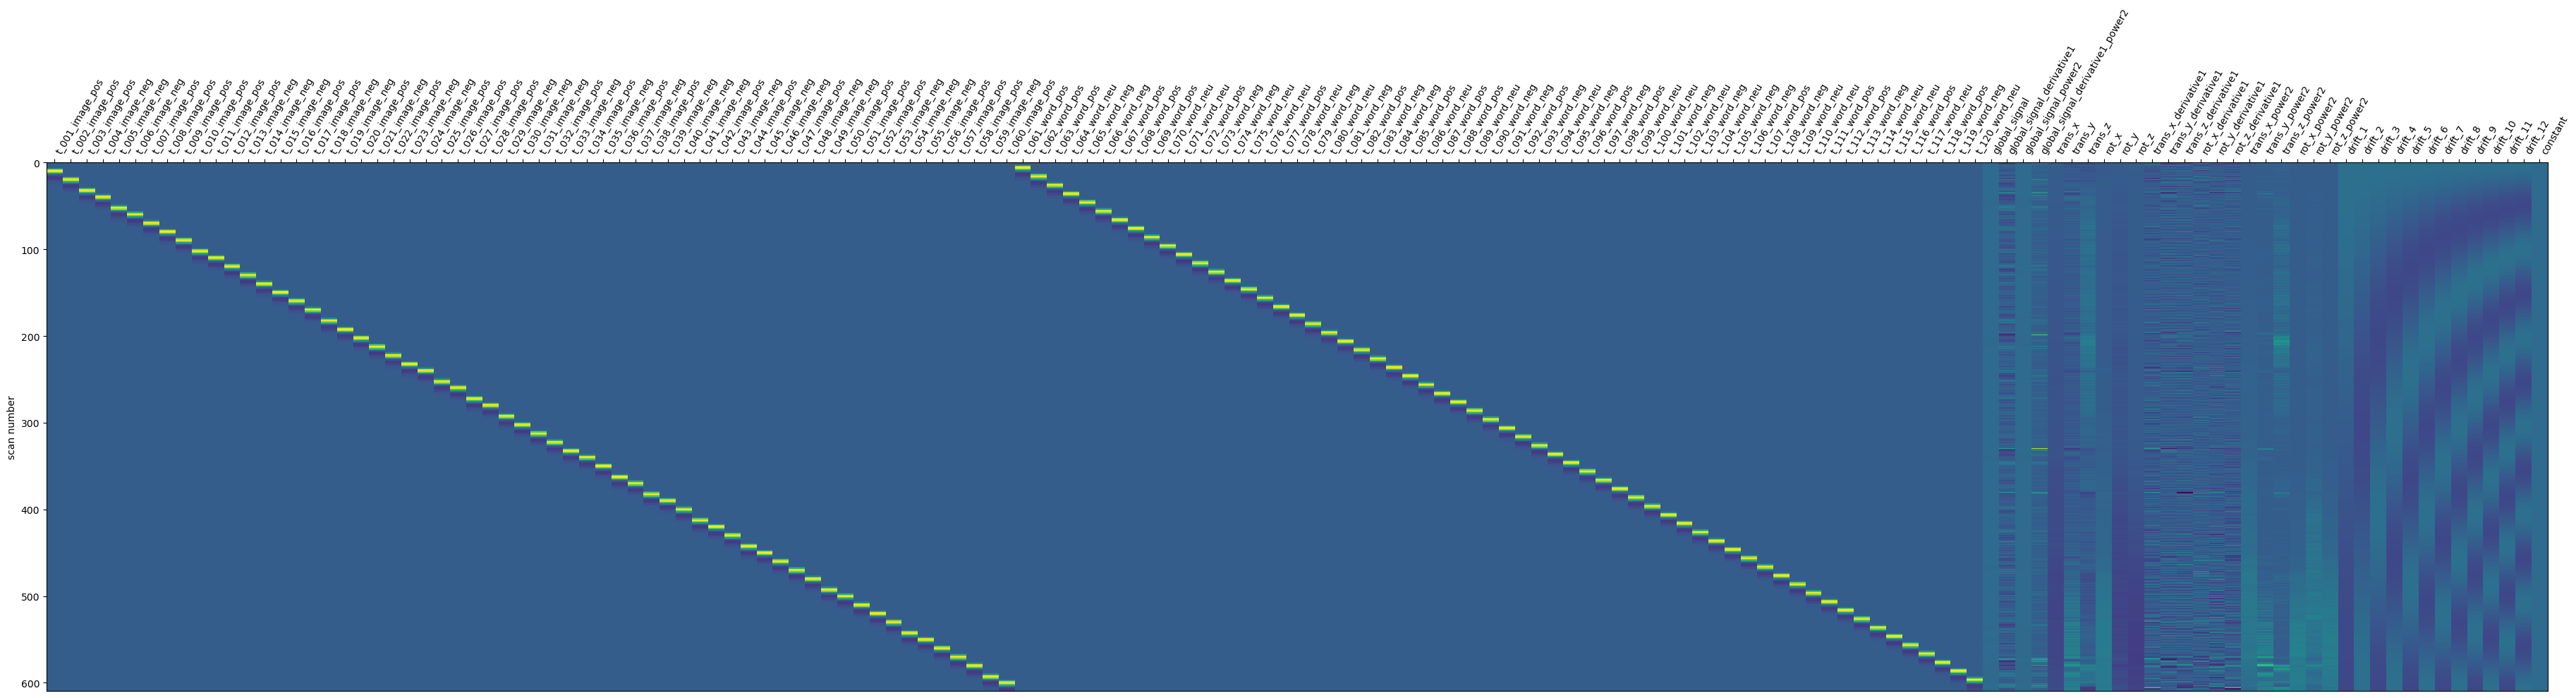

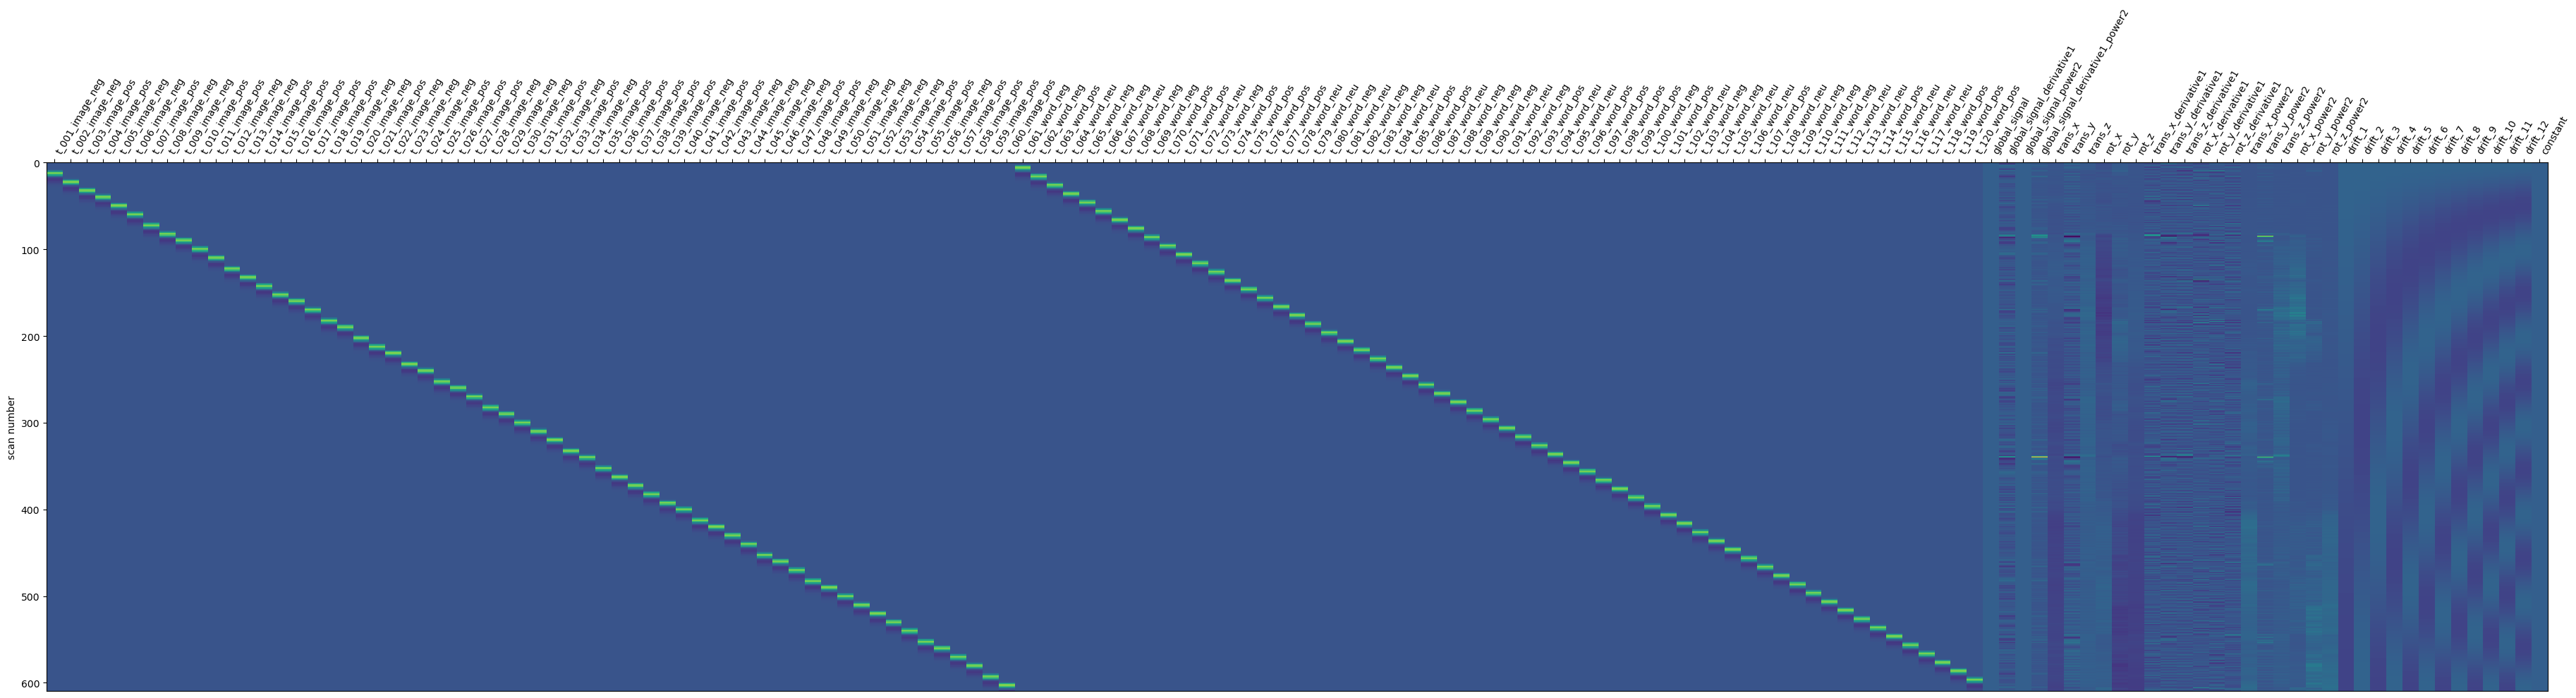

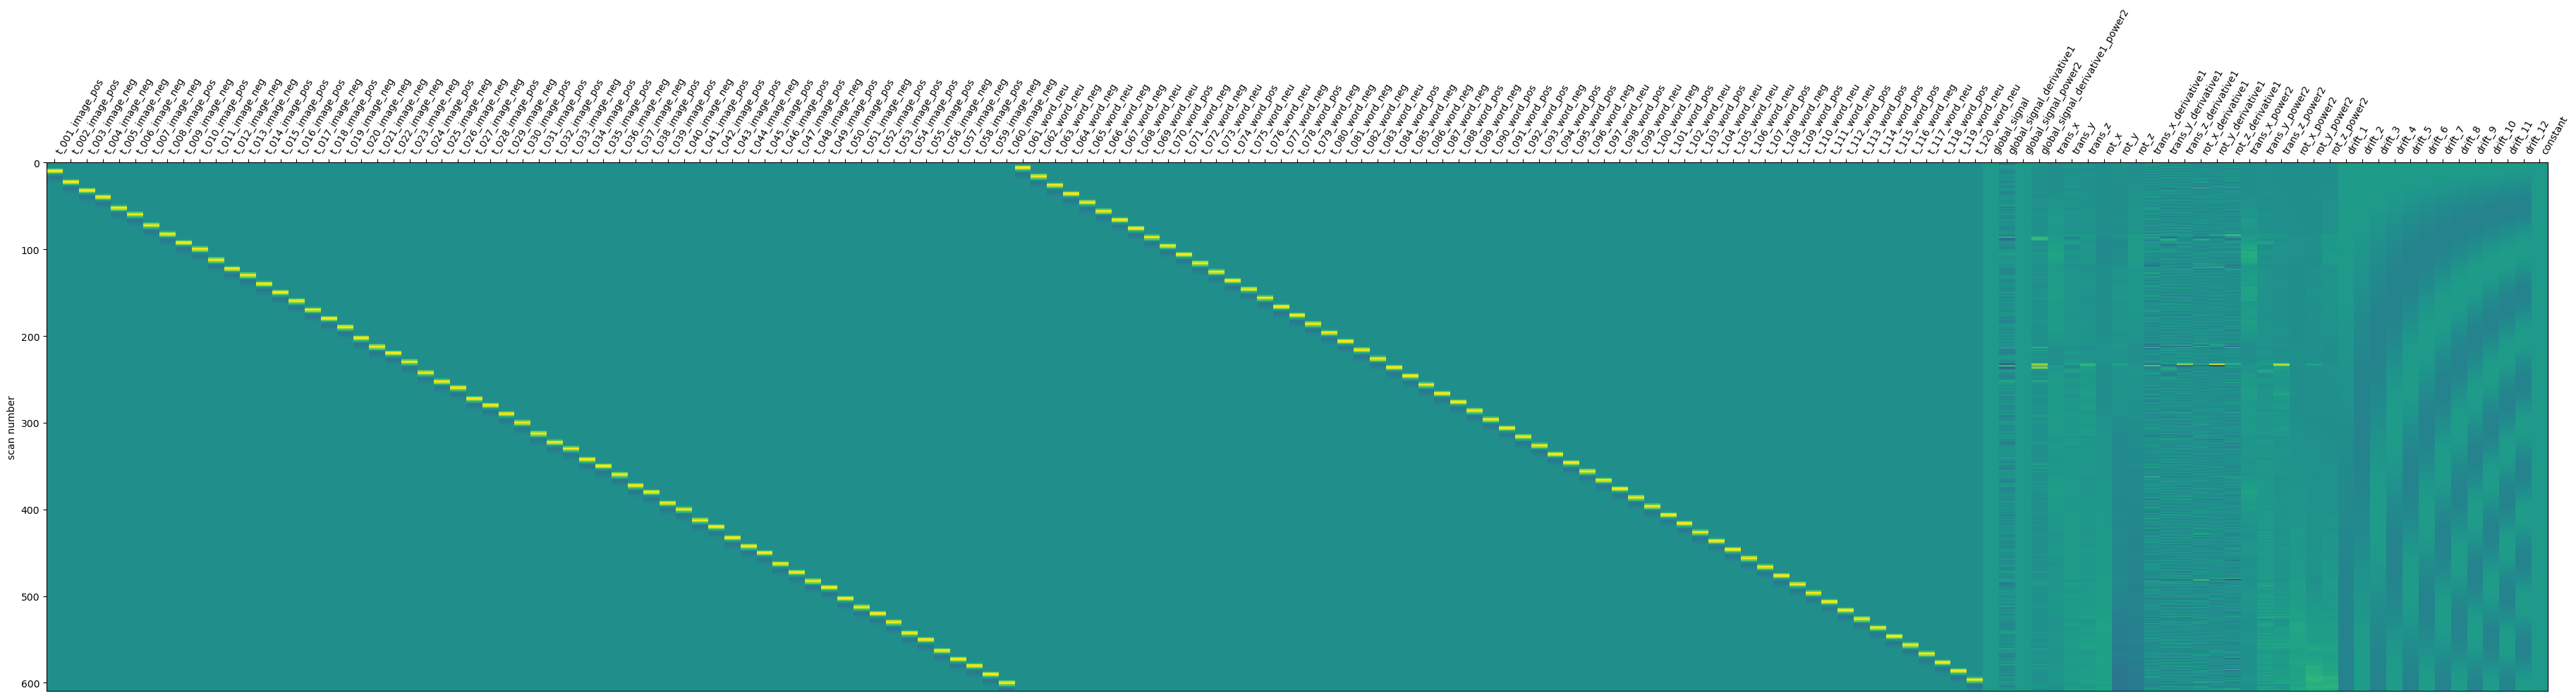

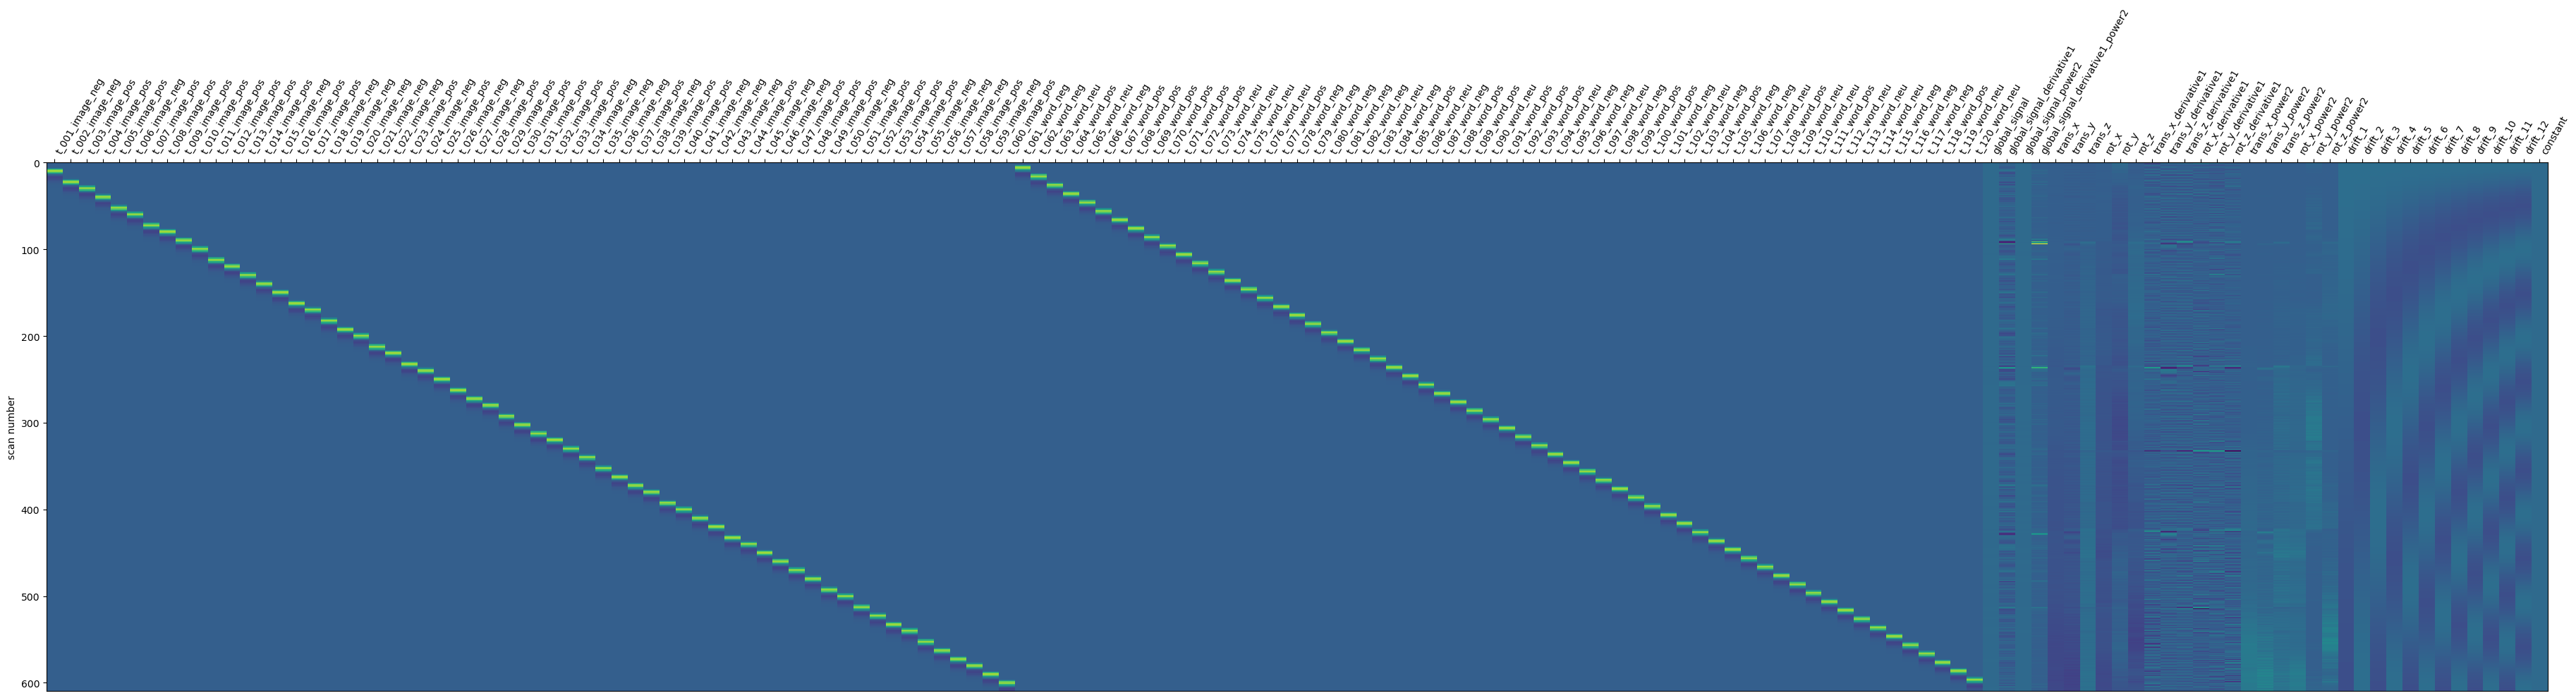

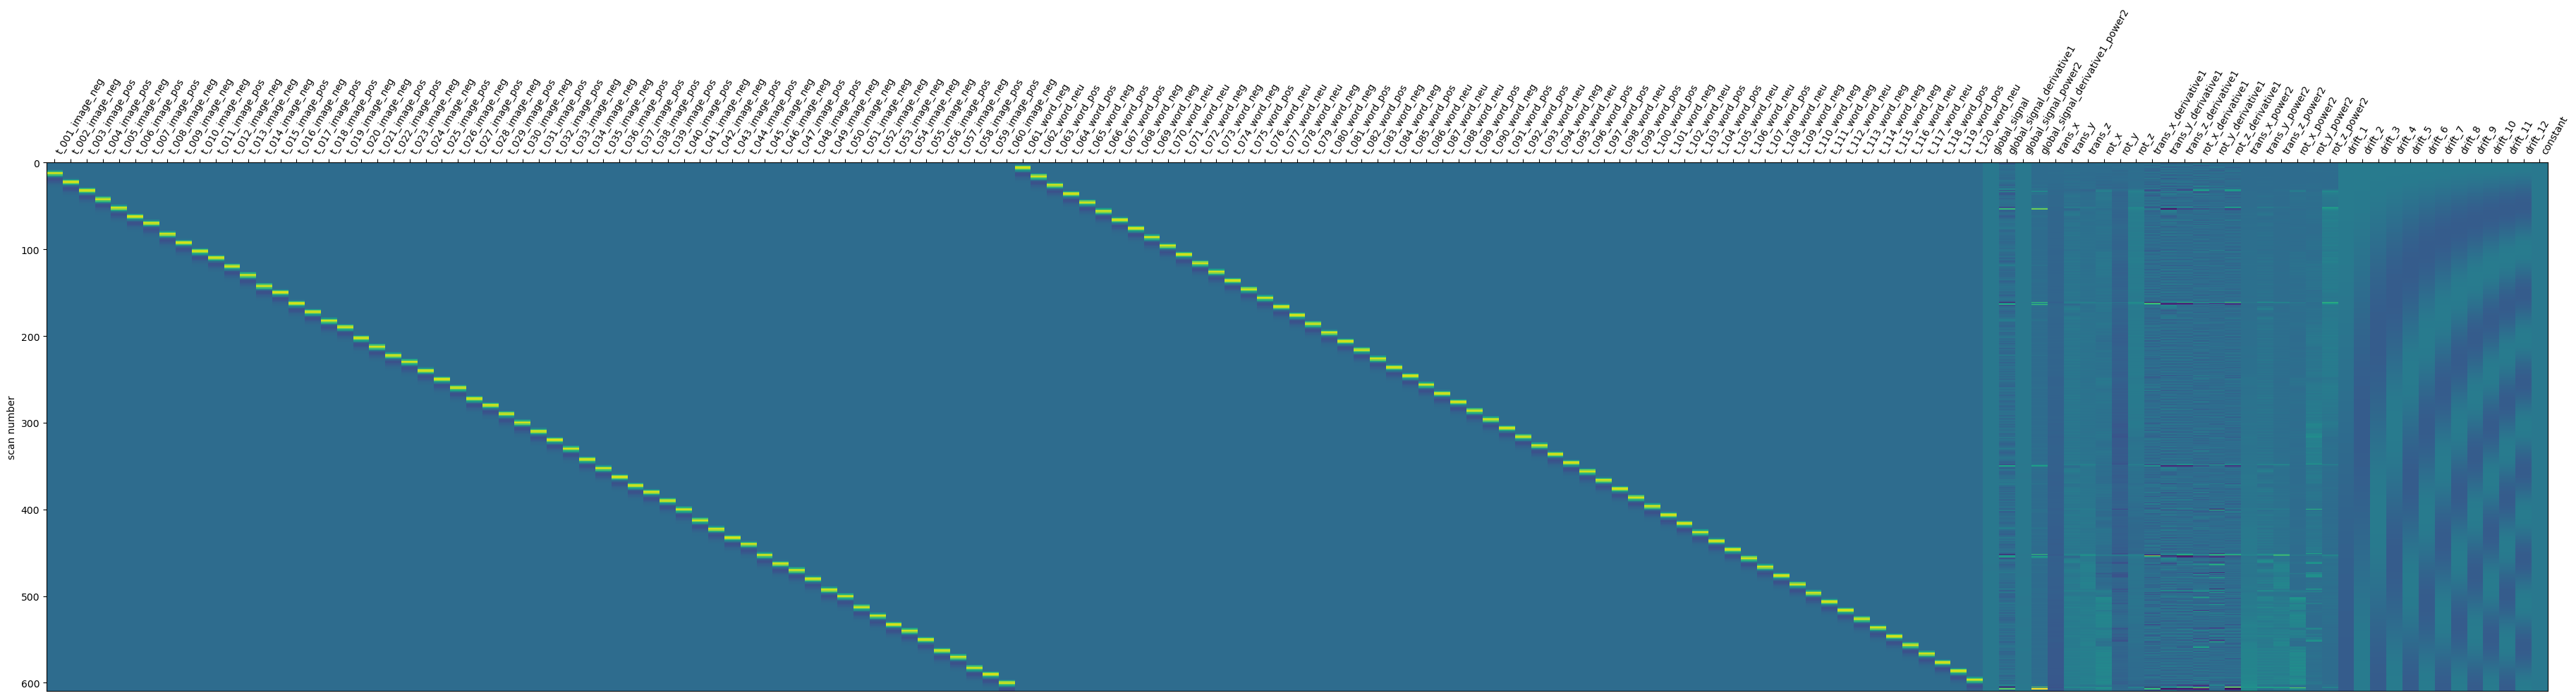

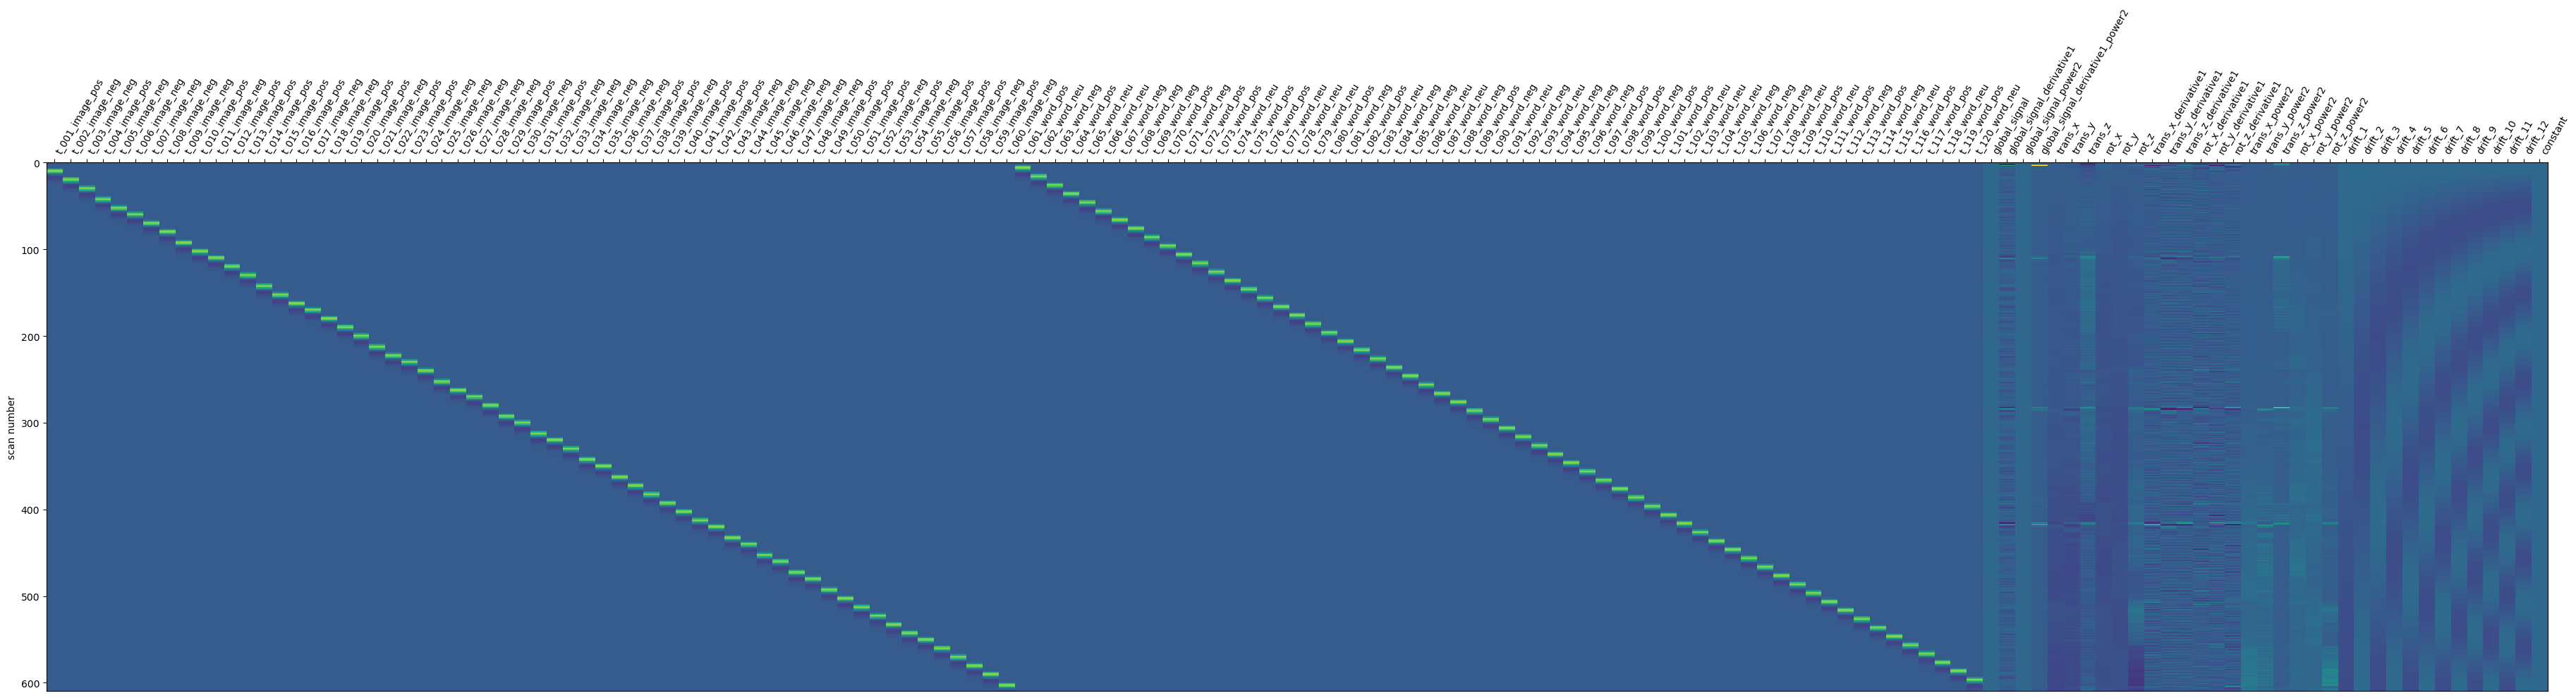

In [5]:
from nilearn.plotting import plot_design_matrix
#Plotting participant 22
for ii in range(len(models_events[21])):
    plot_design_matrix(lsa_dm[21][ii]);

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

### Let's inspect the correlational structure of the design matrix

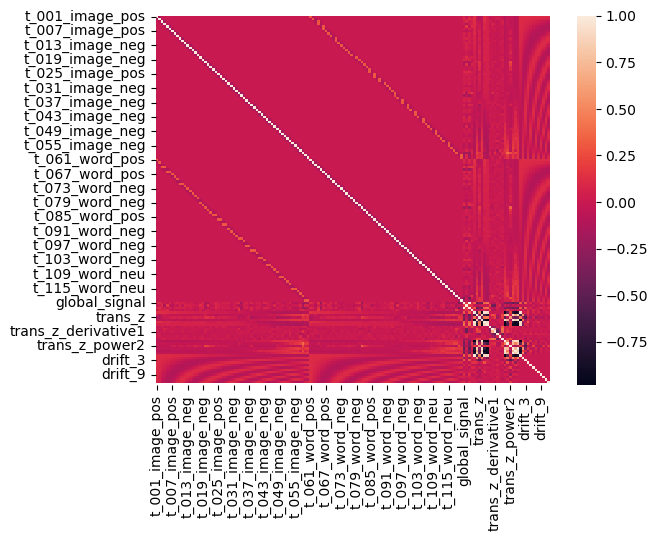

In [6]:
import seaborn as sns
#Again from participant 22
dm_corr=lsa_dm[21][0].corr()
p1 = sns.heatmap(dm_corr)

## Fit the models for all sessions from one participant

In [7]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

from nilearn.glm.first_level import FirstLevelModel

N_par=len(models_events) # Number of participants
models_trials_all= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    #models_trials_all[i]= np.empty((len(models_events[i]), 0)).tolist()
    for ii in range(len(models_events[i])):
    
        # Get data and model info for 1st participant, 1st session
        imgs_trials=models_run_imgs[i][ii]
        models_trials_all[i].append (FirstLevelModel())
        #Fit the model
        text = "Fitting GLM for participant %d, session %d" % (i+1, ii+1)
        print(text)
        models_trials_all[i][ii].fit(imgs_trials,design_matrices=lsa_dm[i][ii])


import pickle

# Saving the objects:
f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials_all_par.pkl', 'wb')
pickle.dump([models_trials_all, lsa_dm], f)
f.close()
        
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 23:34:08
Fitting GLM for participant 1, session 1
Fitting GLM for participant 1, session 2
Fitting GLM for participant 1, session 3
Fitting GLM for participant 1, session 4
Fitting GLM for participant 1, session 5
Fitting GLM for participant 1, session 6
Fitting GLM for participant 2, session 1
Fitting GLM for participant 2, session 2
Fitting GLM for participant 2, session 3
Fitting GLM for participant 2, session 4
Fitting GLM for participant 2, session 5
Fitting GLM for participant 2, session 6
Fitting GLM for participant 3, session 1
Fitting GLM for participant 3, session 2


/opt/conda/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Fitting GLM for participant 3, session 3
Fitting GLM for participant 3, session 4
Fitting GLM for participant 3, session 5
Fitting GLM for participant 3, session 6
Fitting GLM for participant 4, session 1
Fitting GLM for participant 4, session 2


/opt/conda/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Fitting GLM for participant 4, session 3
Fitting GLM for participant 4, session 4
Fitting GLM for participant 4, session 5
Fitting GLM for participant 4, session 6
Fitting GLM for participant 5, session 1


/opt/conda/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Fitting GLM for participant 5, session 2


/opt/conda/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Fitting GLM for participant 5, session 3
Fitting GLM for participant 5, session 4
Fitting GLM for participant 5, session 5
Fitting GLM for participant 5, session 6
Fitting GLM for participant 6, session 1
Fitting GLM for participant 6, session 2
Fitting GLM for participant 6, session 3
Fitting GLM for participant 6, session 4
Fitting GLM for participant 6, session 5
Fitting GLM for participant 6, session 6
Fitting GLM for participant 7, session 1
Fitting GLM for participant 7, session 2
Fitting GLM for participant 7, session 3
Fitting GLM for participant 7, session 4
Fitting GLM for participant 7, session 5


/opt/conda/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Fitting GLM for participant 7, session 6


/opt/conda/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Fitting GLM for participant 8, session 1
Fitting GLM for participant 8, session 2
Fitting GLM for participant 8, session 3
Fitting GLM for participant 8, session 4
Fitting GLM for participant 8, session 5
Fitting GLM for participant 8, session 6
Fitting GLM for participant 9, session 1
Fitting GLM for participant 9, session 2
Fitting GLM for participant 9, session 3
Fitting GLM for participant 9, session 4
Fitting GLM for participant 9, session 5
Fitting GLM for participant 9, session 6
Fitting GLM for participant 10, session 1
Fitting GLM for participant 10, session 2
Fitting GLM for participant 10, session 3
Fitting GLM for participant 10, session 4
Fitting GLM for participant 10, session 5


/opt/conda/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Fitting GLM for participant 10, session 6
Fitting GLM for participant 11, session 1


/opt/conda/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Fitting GLM for participant 11, session 2
Fitting GLM for participant 11, session 3
Fitting GLM for participant 11, session 4


/opt/conda/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Fitting GLM for participant 11, session 5
Fitting GLM for participant 11, session 6
Fitting GLM for participant 12, session 1
Fitting GLM for participant 12, session 2
Fitting GLM for participant 12, session 3
Fitting GLM for participant 12, session 4
Fitting GLM for participant 12, session 5
Fitting GLM for participant 12, session 6
Fitting GLM for participant 13, session 1
Fitting GLM for participant 13, session 2
Fitting GLM for participant 13, session 3
Fitting GLM for participant 13, session 4


/opt/conda/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Fitting GLM for participant 13, session 5
Fitting GLM for participant 13, session 6
Fitting GLM for participant 14, session 1
Fitting GLM for participant 14, session 2
Fitting GLM for participant 14, session 3
Fitting GLM for participant 14, session 4
Fitting GLM for participant 14, session 5
Fitting GLM for participant 14, session 6
Fitting GLM for participant 15, session 1
Fitting GLM for participant 15, session 2
Fitting GLM for participant 15, session 3
Fitting GLM for participant 15, session 4
Fitting GLM for participant 15, session 5
Fitting GLM for participant 15, session 6
Fitting GLM for participant 16, session 1
Fitting GLM for participant 16, session 2
Fitting GLM for participant 16, session 3
Fitting GLM for participant 16, session 4
Fitting GLM for participant 16, session 5
Fitting GLM for participant 16, session 6
Fitting GLM for participant 17, session 1
Fitting GLM for participant 17, session 2
Fitting GLM for participant 17, session 3
Fitting GLM for participant 17, se

/opt/conda/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Fitting GLM for participant 19, session 6
Fitting GLM for participant 20, session 1
Fitting GLM for participant 20, session 2
Fitting GLM for participant 20, session 3


/opt/conda/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Fitting GLM for participant 20, session 4
Fitting GLM for participant 20, session 5
Fitting GLM for participant 20, session 6
Fitting GLM for participant 21, session 1
Fitting GLM for participant 21, session 2
Fitting GLM for participant 21, session 3
Fitting GLM for participant 21, session 4
Fitting GLM for participant 21, session 5
Fitting GLM for participant 21, session 6
Fitting GLM for participant 22, session 1
Fitting GLM for participant 22, session 2
Fitting GLM for participant 22, session 3
Fitting GLM for participant 22, session 4


/opt/conda/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:64: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


Fitting GLM for participant 22, session 5
Fitting GLM for participant 22, session 6
Finishing cell: 02:39:17


## Saving/retrieving the fitted models and design matrices

In [12]:


## Getting back the objects:
#f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials.pkl', 'rb')
#model1, lsa_dm = pickle.load(f)
#f.close()

#print(model1[0])
#now = datetime.now()
#print('Finishing cell:',now.strftime("%H:%M:%S"))

## Making z-map contrasts from the fitted model to use in later analyses

In [ ]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))


N_par=len(models_events) # Number of participants
z_maps_all= np.empty((N_par, 0)).tolist()
conditions_label_all= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    for ii in range(len(models_events[i])):
        text = "Making contrasts for participant %d , session %d" % (i+1, ii+1)
        print(text)
        N=models_events[i][ii].shape[0]
        #Make an identity matrix with N= number of trials
        contrasts=np.eye(N)
        
        #Find difference between columns in design matrix and number of trials
        dif=lsa_dm[i][ii].shape[1]-contrasts.shape[1]
        
        #Pad with zeros
        contrasts=np.pad(contrasts, ((0,0),(0,dif)),'constant')
        print(contrasts.shape)
        for iii in range(N):
            #Add a z-contrast image from each trial
            z_maps_all[i].append(models_trials_all[i][ii].compute_contrast(contrasts[iii,], output_type='z_score'))
            # Make a variable with condition labels for use in later classification
            conditions_label_all[i].append(models_events[i][ii]['trial_type'][iii])

import pickle

#Save the first level models

# Saving the objects:
f = open('/work/MikkelWallentin#6287/WordFace_first_level_z_maps_all_trials_all_par.pkl', 'wb')
pickle.dump([conditions_label_all, z_maps_all], f)
f.close()
            
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 07:13:21
Making contrasts for participant 1 , session 1
(120, 155)
Making contrasts for participant 1 , session 2
(120, 155)
Making contrasts for participant 1 , session 3
(120, 155)
Making contrasts for participant 1 , session 4
(120, 155)
Making contrasts for participant 1 , session 5
(120, 155)
Making contrasts for participant 1 , session 6
(120, 155)
Making contrasts for participant 2 , session 1
(120, 155)
Making contrasts for participant 2 , session 2
(120, 155)
Making contrasts for participant 2 , session 3
(120, 155)
Making contrasts for participant 2 , session 4
(120, 155)
Making contrasts for participant 2 , session 5
(120, 155)
Making contrasts for participant 2 , session 6
(120, 155)
Making contrasts for participant 3 , session 1
(120, 155)
Making contrasts for participant 3 , session 2
(120, 155)
Making contrasts for participant 3 , session 3
(120, 155)
Making contrasts for participant 3 , session 4
(120, 155)
Making contrasts for participant 3 , session 5
(

## Saving models and z_maps

In [2]:
import pickle

# Getting back the objects:

f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials_all_par.pkl', 'rb')
models_trials_all, lsa_dm, conditions_label_all, z_maps_all = pickle.load(f)

f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

/opt/conda/lib/python3.10/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


ValueError: not enough values to unpack (expected 4, got 2)

## Reshape data for classification

In [1]:

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

import numpy as np
#from nilearn import datasets
from nilearn.image import new_img_like, load_img, index_img, clean_img
from sklearn.model_selection import train_test_split, GroupKFold

N_par=len(models_events) # Number of participants
z_maps_img_all= np.empty((N_par, 0)).tolist()
z_maps_conc= np.empty((N_par, 0)).tolist()
conditions= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    n_trials=len(conditions_label_all[i])
    text = "Reshaping participant %d\n" % (i+1)
    print(text)


    # Reshaping data------------------------------
    from nilearn.image import index_img, concat_imgs
    idx_neg=[int(iii) for iii in range(len(conditions_label_all[i])) if conditions_label_all[i][iii]=='image_neg']
    idx_pos=[int(iii) for iii in range(len(conditions_label_all[i])) if conditions_label_all[i][iii]=='image_pos']

    #Concatenate trials
    idx=np.concatenate((idx_neg, idx_pos))

    conditions[i]=np.array(conditions_label_all[i])[idx]
    z_maps_conc[i]=concat_imgs(z_maps_all[i])
    print(z_maps_conc[i].shape)
    z_maps_img_all[i] = index_img(z_maps_conc[i], idx)

    print(z_maps_img_all[i].shape)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

NameError: name 'datetime' is not defined

## create training and testing vars on the basis of class labels

In [ ]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

N_par=len(models_events) # Number of participants
idx1= np.empty((N_par, 0)).tolist()
idx2= np.empty((N_par, 0)).tolist()
conditions1= np.empty((N_par, 0)).tolist()
conditions2= np.empty((N_par, 0)).tolist()
fmri_img1= np.empty((N_par, 0)).tolist()
fmri_img2= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    text = "Creating trian/test data for participant %d\n" % (i+1)
    print(text)
    idx2[i]=np.arange(conditions[i].shape[0])
    # create training and testing vars on the basis of class labels
    idx1[i],idx2[i], conditions1[i],  conditions2[i] = train_test_split(idx2[i],conditions[i], test_size=0.2)
    
    # Reshaping data------------------------------
    from nilearn.image import index_img
    fmri_img1[i] = index_img(z_maps_img_all[i], idx1[i])
    fmri_img2[i] = index_img(z_maps_img_all[i], idx2[i])

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

## Prepare a searchlight analysis on the first split

In [ ]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
# -------------------
import pandas as pd
import numpy as np
from nilearn.image import new_img_like, load_img

#Whole brain mask. Using one from a one participant for all
mask_wb_filename='/work/82777/BIDS/derivatives/sub-0096/anat/sub-0096_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
#Load the whole brain mask
mask_img = load_img(mask_wb_filename)


# .astype() makes a copy.
process_mask = mask_img.get_fdata().astype(np.int)
#Set slices below x in the z-dimension to zero (in voxel space)
process_mask[..., :30] = 0
#Set slices above x in the z-dimension to zero (in voxel space)
process_mask[..., 160:] = 0
process_mask_img = new_img_like(mask_img, process_mask)


#Plot the mask
plot_img(process_mask_img, title="Mask", display_mode="z",cut_coords=[-30,-20,-10,0,10,20,30,40,50],
         vmin=.40, cmap='jet', threshold=0.9, black_bg=True)
#########################################################################


#########################################################################

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

## Run the searchlight analysis

In [ ]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))
#n_jobs=-1 means that all CPUs will be used

from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn import decoding
from sklearn import naive_bayes, model_selection #import GaussianNB
from nilearn.decoding import SearchLight
from sklearn.svm import LinearSVC


N_par=len(models_events) # Number of participants
searchlight_all= np.empty((N_par, 0)).tolist()

for i in range(N_par):
    text = "Conducting searchlight on participant %d" % (i+1)
    print(text)
    # The radius is the one of the Searchlight sphere that will scan the volume
    searchlight_all[i] = SearchLight(
        mask_img,
        estimator=LinearSVC(penalty='l2'),
        process_mask_img=process_mask_img,
        radius=5, n_jobs=-1,
        verbose=10, cv=10)
    searchlight[i].fit(fmri_img1[i], conditions1[i])

    import pickle

#Save the first level models

# Saving the objects:
f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials_searchlight_all_par.pkl', 'wb')
pickle.dump([searchlight_all], f)
f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

## Save/restore the variables

In [ ]:


# Getting back the objects:
#f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials_searchlight_all_par.pkl', 'rb')
#searchlight = pickle.load(f)
#f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

## Plot the outcome of the searchlight analysis

In [ ]:
from nilearn.plotting import plot_glass_brain

from nilearn import plotting
import matplotlib.pyplot as plt

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

N_par=len(models_events) # Number of participants
searchlight_img= np.empty((N_par, 0)).tolist()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20)) 
for i in range(N_par):
    #Create an image of the searchlight scores
    searchlight_img[i] = new_img_like(mask_wb_filename, searchlight_all[i].scores_)
    plotting.plot_glass_brain(searchlight_img[i], cmap='jet',colorbar=True, threshold=0.6,
                              title=('sub-' + i+1),
                              axes=axes[int(m_idx / 5), int(m_idx % 5)],
                              plot_abs=False, display_mode='x')

   
fig.suptitle('Classification accuracy (unc Acc>0.6)')
plt.show()

# Saving the objects:
f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials_searchlight_all_par.pkl', 'wb')
pickle.dump([searchlight_all, searchlight_img], f)
f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

### Find the 500 most predictive voxels 

In [ ]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

N_par=len(models_events) # Number of participants
cut= np.empty((N_par, 0)).tolist()
perc= np.empty((N_par, 0)).tolist()
process_mask2_img[i]= np.empty((N_par, 0)).tolist()


#Load the whole brain mask
mask_img2 = load_img(mask_wb_filename)

for i in range(N_par):
    #Find the percentile that makes the cutoff for the 500 best voxels
    perc[i]=100*(1-500.0/searchlight_all.scores_.size)
    #Find the cutoff
    cut[i]=np.percentile(searchlight_all[i].scores_,perc)
    #Print cutoff
    text='Cutoff for participant %d: %d ' % (i+1, cut[i])
    print(text)

    # .astype() makes a copy.
    process_mask2 = mask_img2.get_fdata().astype(np.int)
    process_mask2[searchlight_all[i].scores_<=cut[i]] = 0
    process_mask2_img[i] = new_img_like(mask_img2, process_mask2)

    

# Saving the objects:
f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials_searchlight_all_par.pkl', 'wb')
pickle.dump([searchlight_all, searchlight_img, cut, perc, process_mask2_img], f)
f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

In [ ]:
### Make a classification on the 2nd split using the best voxels

### Perform a permutation test

In [ ]:
now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

from sklearn.model_selection import permutation_test_score

for i in range(N_par):
    
    masker = NiftiMasker(mask_img=process_mask2_img[i], standardize=False)
    # We use masker to retrieve a 2D array ready
    # for machine learning with scikit-learn
    fmri_masked = masker.fit_transform(fmri_img2[i])
    #Print size of matrix (images x voxels)
    
    score[i], permutation_scores[i], pvalue[i]= permutation_test_score(
        LinearSVC(penalty='l2'), fmri_masked[i], conditions2[i], cv=10, n_permutations=1000, 
        n_jobs=-1, random_state=0, verbose=0, scoring=None)
    print("Classification Accuracy for participant %d: %s (pvalue : %s)" % (i,score, pvalue))
 
# Saving the objects:
f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials_searchlight_all_par.pkl', 'wb')
pickle.dump([searchlight_all, searchlight_img, cut, perc, process_mask2_img, score,permutation_score,pvalue], f)
f.close()


now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

### View a histogram of permutation scores

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
#How many classes
#n_classes = np.unique(conditions2).size

#plt.hist(permutation_scores, 20, label='Permutation scores',
#         edgecolor='black')
#ylim = plt.ylim()
#plt.plot(2 * [score], ylim, '--g', linewidth=3,
#         label='Classification Score'
#         ' (pvalue %s)' % pvalue)
#plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Chance level')

#plt.ylim(ylim)
#plt.legend()
#plt.xlabel('Score')
#plt.show()